# Building a Recurrent Neural Network

## Sentiment Analysis
In this project, we will build a Long Short-term Memory (LSTM) neural network to solve a binary sentiment analysis problem.

For this, we'll use the “IMDB Movie Review Dataset" available on Keras. It includes 50000 highly polarized movie reviews categorized as positive or negative.

## Importing the required libraries
We'll start with importing required libraries.

📌 Use the keyword "import".

In [1]:
# Import TensorFlow
import tensorflow as tf

# Import NumPy and Matplotlib
import numpy as np
import matplotlib.pyplot as plt

## Dataset
Let's download the IMDB dataset which is included in Keras, and assign it to the corresponding variables *X_train*, *y_train*, *X_test*, and *y_test*. We want to include the most frequently used 10000 words, so we specify 10000 for the num_words parameter.

📌 Use the datasets.imdb.load_data() function of the Keras.

In [2]:
# Download the IMDB dataset included in Keras
# Set the parameter num_words to 100000
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.imdb.load_data(num_words=10000)

Before we move on, we can print a single sample to see what the data looks like.

📌 Use the print() function for this.

In [3]:
# Print a sample
print(X_train[3])

[1, 4, 2, 2, 33, 2804, 4, 2040, 432, 111, 153, 103, 4, 1494, 13, 70, 131, 67, 11, 61, 2, 744, 35, 3715, 761, 61, 5766, 452, 9214, 4, 985, 7, 2, 59, 166, 4, 105, 216, 1239, 41, 1797, 9, 15, 7, 35, 744, 2413, 31, 8, 4, 687, 23, 4, 2, 7339, 6, 3693, 42, 38, 39, 121, 59, 456, 10, 10, 7, 265, 12, 575, 111, 153, 159, 59, 16, 1447, 21, 25, 586, 482, 39, 4, 96, 59, 716, 12, 4, 172, 65, 9, 579, 11, 6004, 4, 1615, 5, 2, 7, 5168, 17, 13, 7064, 12, 19, 6, 464, 31, 314, 11, 2, 6, 719, 605, 11, 8, 202, 27, 310, 4, 3772, 3501, 8, 2722, 58, 10, 10, 537, 2116, 180, 40, 14, 413, 173, 7, 263, 112, 37, 152, 377, 4, 537, 263, 846, 579, 178, 54, 75, 71, 476, 36, 413, 263, 2504, 182, 5, 17, 75, 2306, 922, 36, 279, 131, 2895, 17, 2867, 42, 17, 35, 921, 2, 192, 5, 1219, 3890, 19, 2, 217, 4122, 1710, 537, 2, 1236, 5, 736, 10, 10, 61, 403, 9, 2, 40, 61, 4494, 5, 27, 4494, 159, 90, 263, 2311, 4319, 309, 8, 178, 5, 82, 4319, 4, 65, 15, 9225, 145, 143, 5122, 12, 7039, 537, 746, 537, 537, 15, 7979, 4, 2, 594, 7, 516

Then, we print the the number of samples in the X_train and X_test datasets to see how the dataset is distributed.

📌 Use f-strings for this.

In [4]:
# Print the number of samples
print(f' X_train:{len(X_train)} \n X_test:{len(X_test)} \n y_train:{len(y_train)} \n y_test:{len(y_test) }')

 X_train:25000 
 X_test:25000 
 y_train:25000 
 y_test:25000


# Preprocessing
### Concatenate

To split the dataset with 80-10-10 ratio, we'll first concatenate train and test datasets to create one big dataset.

📌 Use contenate() function of the NumPy library for this.

In [5]:
# Concatenate X_train and X_test and assing it to a variable X
X = np.concatenate((X_train, X_test), axis=0)

# Concatenate y_train and y_test and assing it to a variable y
y = np.concatenate((y_train, y_test), axis=0)

In [6]:
X.size

50000

###Padding

Since all reviews are at different lengths, we'll use padding to make all of them same length.

📌 Use preprocessing.sequence.pad_sequences() function for this.

In [7]:
X = tf.keras.preprocessing.sequence.pad_sequences(X, maxlen=1024)

### Splitting

Now, split X and y into train, validation and test dataset and assign those to corresponding values.

📌 You can use list slicing methods for this.

📌 For this dataset, a 80-10-10 split corresponds to 40000 - 10000 - 10000 number of samples relatively.


In [8]:
y.size

50000

In [9]:
# from sklearn.model_selection import train_test_split

# X_train, X_temp, y_train, y_temp = train_test_split(X, y, train_size=0.8, random_state=1) #train set
# X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=1) #test and validation set

In [10]:
#training set
X_train = X[:40000]
y_train = y[:40000]

#validation set
X_val = X[40000:45000]
y_val = y[40000:45000]

#test set
X_test = X[45000:50000]
y_test = y[45000:50000]

To check if that worked out, print the number of samples in each dataset again.

📌 Use f-strings for this.

In [11]:
# Print the number of samples
print(f' X_train:{len(X_train)} \n X_test:{len(X_test)} \n y_train:{len(y_train)} \n y_test:{len(y_test) }')
print(f' X_val:{len(X_val)} \n y_val:{len(y_val)}')

 X_train:40000 
 X_test:5000 
 y_train:40000 
 y_test:5000
 X_val:5000 
 y_val:5000


## Constructing the neural network

That was it for the preprocessing of the data!

Now we can create our model. First, we start by creating a model object using the Sequential API of Keras.

📌 Use tf.keras.Sequential() to create a model object

In [12]:
model = tf.keras.Sequential()

### Embedding Layer

For the first layer, we add an embedding layer.

📌 Use tf.keras.layers.Embedding() for the embedding layer.

📌 Use .add() method of the object to add the layer.

In [13]:
# Add an embedding layer and a dropout
model.add(tf.keras.layers.Embedding(input_dim=10000, output_dim=256))
model.add(tf.keras.layers.Dropout(0.7))

Then, we add a LSTM layer and a dense layer; each with a dropout.

📌 Use tf.keras.layers.LSTM() and tf.keras.layers.Dense() to create the layers.

📌 Use .add() method of the object to add the layer.

In [14]:
# Add a LSTM layer with dropout
model.add(tf.keras.layers.LSTM(256))
model.add(tf.keras.layers.Dropout(0.7))

# Add a Dense layer with dropout
model.add(tf.keras.layers.Dense(128, activation='relu')) #0 for negative, linear for positive

### Output layer

As the last part of our neural network, we add the output layer. The number of nodes will be one since we are making binary classification. We'll use the sigmoid activation function in the output layer.

📌 Use tf.keras.layers.Dense() to create the layer.

📌 Use .add() method of the object to add the layer.

In [15]:
# Add the output layer
model.add(tf.keras.layers.Dense(1, activation='sigmoid')) #for binary classification

### Optimizer

Now we have the structure of our model. To configure the model for training, we'll use the *.compile()* method. Inside the compile method, we have to define the following:
*   "Adam" for optimizer
*   "Binary Crossentropy" for the loss function


📌 Construct the model with the .compile() method.

In [16]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 256)         2560000   
                                                                 
 dropout (Dropout)           (None, None, 256)         0         
                                                                 
 lstm (LSTM)                 (None, 256)               525312    
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense (Dense)               (None, 128)               32896     
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 3118337 (11.90 MB)
Trainable params: 31183

## Training the model

It's time to train the model. We'll give the X_train and y_train datasets as the first two arguments. These will be used for training. And with the *validation_data* parameter, we'll give the X_val and y_val as a tuple.

📌 Use .fit() method of the model object for the training.

In [18]:
type(X_val)

numpy.ndarray

In [20]:
# Train the model for 5 epochs
# results = model.fit(X_train, y_train, epochs=5, validation_data=(X_val, y_val))
results = model.fit(X_train, y_train, epochs=5, validation_data=(X_val, y_val))

Epoch 1/5
1250/1250 [==============================] - 143s 104ms/step - loss: 0.4548 - accuracy: 0.7903 - val_loss: 0.3345 - val_accuracy: 0.8620
Epoch 2/5
1250/1250 [==============================] - 90s 72ms/step - loss: 0.3207 - accuracy: 0.8730 - val_loss: 0.2840 - val_accuracy: 0.8832
Epoch 3/5
1250/1250 [==============================] - 85s 68ms/step - loss: 0.3367 - accuracy: 0.8604 - val_loss: 0.3148 - val_accuracy: 0.8642
Epoch 4/5
1250/1250 [==============================] - 83s 66ms/step - loss: 0.2266 - accuracy: 0.9147 - val_loss: 0.2497 - val_accuracy: 0.9004
Epoch 5/5
1250/1250 [==============================] - 82s 66ms/step - loss: 0.1851 - accuracy: 0.9320 - val_loss: 0.2435 - val_accuracy: 0.9032


### Visualize the results

After the model is trained, we can create a graph to visualize the change of loss over time. Results are held in:
* results.history["loss"]
* results.history["val_loss"]

📌 Use plt.show() to display the graph.

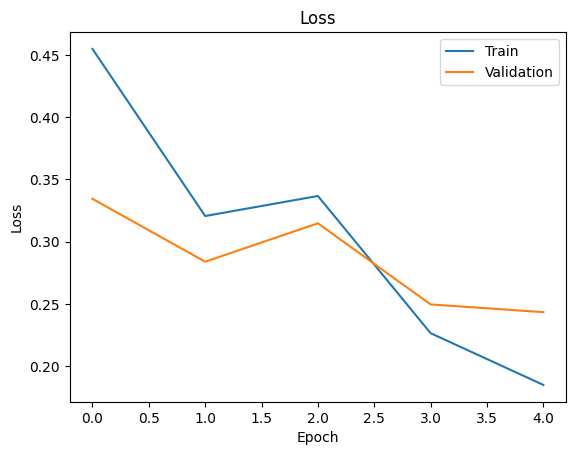

In [25]:
# Plot the the training loss
plt.plot(results.history['loss'], label='Train')

# Plot the the validation loss
plt.plot(results.history['val_loss'], label='Validation')

# Name the x and y axises
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')

# Put legend table
plt.legend()

# Show the plot
plt.show()

Now, do the same thing for accuracy.

📌 Accuracy scores can be found in:
* results.history["accuracy"]
* results.history["val_accuracy"]



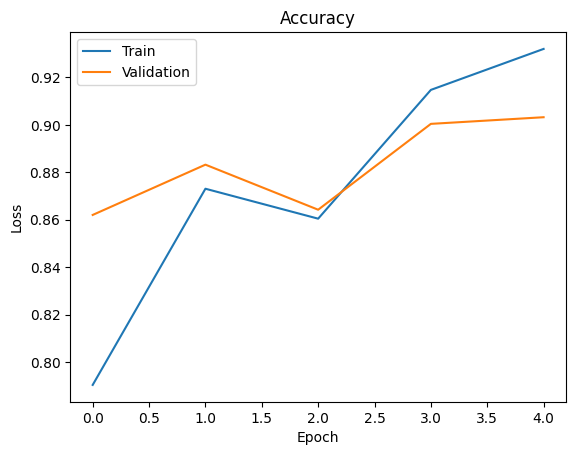

In [24]:
# Plot the the training accuracy
plt.plot(results.history['accuracy'], label='Train')

# Plot the the validation accuracy
plt.plot(results.history['val_accuracy'], label='Validation')

# Name the x and y axises
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Loss')

# Put legend table
plt.legend()

# Show the plot
plt.show()

## Performance evaluation

Let's use the test dataset that we created to evaluate the performance of the model.

📌 Use test_on_batch() method with test dataset as parameter.

In [26]:
# Evaluate the performance
model.evaluate(X_test, y_test)

157/157 [==============================] - 4s 26ms/step - loss: 0.2463 - accuracy: 0.9046


[0.24632057547569275, 0.9046000242233276]

### Try a prediction

Next, we take a sample and make a prediction on it.

📌 Reshape the review to (1, 1024).

📌 Use the .prediction() method of the model object.

In [45]:
# Make prediction on the reshaped sample
prediction_result = model.predict(X_test[4].reshape(1,1024)) #all comments padded/trimmed to 1024 in length

1/1 [==============================] - 0s 54ms/step


In [46]:
print(f' Label: {y_test[4]} | Prediction: {prediction_result}')

 Label: 1 | Prediction: [[0.98634166]]
